# Final Project -Estimating Ages of Prehistoric Penguin Fossils Using Bayesian Inference

In [1]:
%matplotlib inline   

import numpy as np

import scipy.stats as stats
from scipy.stats import cauchy, uniform

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# import corner
import emcee

from IPython.display import display, Math

## Setting up the data

There are 35 different string variables below, each corresponding to a different fossil. Each element in the string corresponds to a given state of a morphological trait, where $?$ and $-$ are disregarded as they do not correspond to any specific state. 

The array gene_sequence has 245 elements, where each element is the maximum number of possible states in a gives morpholigal trait. This is used to calculate the likelihood, combined with the information for any given transition from species A to species B.

In this notebook I specifically modelled the likelihood to look at the transitions from the reference species, which in this case is Waimanu manneringi. Hence, if a given species does not have any morphological traits in common with the reference state, the likelihood function will return $0$. The species I. salasi, P. ponderosus, A. lowei, P. Marplesi, P. novaezealandiae, M. novaezealandiae, P. grandis, and S. megaramphus were discarded due to the log-likelihood function returning a $nan$ or negative infinity. 

In [2]:
#These are the 36 fossils with their morphological traits
w_tuatahi = "?????????????-???????????????????????????????????????????????????????????????-??012???-2?0?????????0??????0-???00????????11?-????????011000??0--11010011?2011?010010111-?02050-0100011????????????????-110?00101000?????????????????0?0---0-00??-?01?"
d_gracilis = "?????????????-???????????????????????????????????????????????????????????????-?????????????????????????????-????????????????-??-??????--?--????-????-???-?????---??????????-??-?????--?????????????????110100110{01}1??????????????????-???--??---?--0??"
d_larseni = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?--????-????-???-?????---??????????-??-?????--????????????????-11?10011001??????????????????-???--??---?--0??"
d_arctowskii = "?????????????-???????????????????????????????????????????????????????????????-?????????????????????????????-????????????????-??-??????--?--????-????-???-?????---??????????-??-?????--?????????????????21?10011001??????????????????-???--??---?--0??"
d_wimani = "?????????????????????????????????????????????????????????????????????????????-?????????????????????????????????????????????????-??????--?--????-????-???-?????---???????????????????-?????????????-----21?1001??{01}???????????????????-???--??---?--???"
p_devriesi = "?????????????-??????????????????????????????????????????????????????????????0-0?0120????????20???????1-???1-?0?0?0???????-?????-??????--?--????-11000010?2011001001?112????-??-1?100-0???010????????-1?{12}?-?00?--21-?????????????????---------?-----0?"
m_exilis = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?--????-????-???-?????---??????????-??-?????--????????????????-11?00011011??????????????????-???--??---?--0??"
m_polaris = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?--????-????-???-?????---??????-???-??-?????--????????????????-11?00011011??????????????????-???--??---?--0??"
a_nordenskjoeldi = "?????????????-???????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?-?????-????????????????????????0??-??-?????--????????????????-1???10010210?????????????????-???--??-?-?--0??"
a_grandis = "?????????????-???????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?-?????-1100??1?020210??????1??????-??-?????--????????????????-11??1001021??????????????????-???--??-?-?--0??"
p_klekowskii = "?????????????-???????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?-?????-1100?01?020210???01?102?002-??-?????--????????????????-2100002--210?????????????????--?------2----00?"
p_gunnari = "?????????????-???????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????--?-?????-1100101002021001101?10?1002-??-?????--????????????????-21??002--210?????????????????--?------2----0??"
b_palaeudyptes = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-????-????????????????-??-??????-??-?????-11001010020210011011002-002-10-111??1-????????????0--102????02--21??????????????????-?---??--2???-?-?"
i_paracensis = "0????????????????????1101??????????????????????????????????????????????????00000012???1?0?0?2???20?000020000?0?00001001?120??????????1111100000?1100101002021001101100200021??1?110?100?????????1201?1?210?002--210???????????????????????0???????0??"
i_salasi = "???????????????????????????????????????????????????????????????????????????0?00?012?????0?002??01??001020001?0?00001?????-?????-????-?11?-0????-110?101?-20210120011002?00211011110110000?-???????-----??-????--??-?????????????????1-----0-1?0?0---?"
p_ponderosus = "?????????????-???????????????????????????????????????????????????????????????-????????????????????????-????-?????????????-??-??-??????--?10?000-110010100202101200{01}10021002-??-1?10-10????-???????-----??-????--??-?????????????????---------2------?"
p_antarcticus = "?????????????????????????????????????????????????????????????????????????????-?????????????????????????????????????????????????-?????????-?????-????????????????????????????????????-??????????????????2100002??21????????????????????--?-?-????-?0-?"
k_grebneffi = "????????????????????????????????????????????????????????????????????????????????????????-????????????????????????????????2????????10??11?10??0011100101?0?0210?20011002?002120?101111000?0???1??120111021-1002--21??????????????????-0?01?011?00?110?"
k_waitaki = "???????????????????????????????????????????????????????????????????????????00???????????0?????????????-20????????????????2?-???1??1?????--0--0011100101??202100?0??????-???1??11?1--1-??00??????1??1???21-1002--21??????????????????100?-??11?0?0-10?"
a_lowei = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-???00????0??????????????-?????????1???00-1100?010?20211???111102110113???????--????-?????12????????????--??-?????????????????-???-?00-????--??"
d_parvus = "?????????????????????????????????????????????????????????????????????????????-?????????????????????????????????????????????????-??????-??--????-????-?????????---???????????????????-?????????????????-21??001???2??????????????????-???-????????-0??"
p_antarcticus1 = "?????????????????????????????????????????????????????????????????????????????-10012?0???????2010??????020???2?0???01001???????????????-2?10?0???110010100202111201100020101-????????-?????-?????12?111121-?001102?0?????????????????1-----0-12---000?"
a_lopdelli = "????????????????????????????????????????????????????????????????????????????0-????????????????????????-??????????????????2?????-?????????-???00?1??????????????????1?02?10113???????--????-???????-----21??0011022-?????????????????-10--???-????-00?"
p_patagonicus = "?????????????-?????-?????????????????????????????????????????????????????????-?????????????1??????????-????-????0??????????????-????-?--2-???11-11111{01}200212111201000020100140-1011110????-?????110?1112101012--210????????????????-?-------011--000?"
p_marplesi = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-????????????????????????-1?00?01211?0010-11011020?2021?12?1??002?101131??011110????-???????-----??-????--??-?????????????????-???1???-????---?"
p_novaezealandiae = "?????????????????????????????????????????????????????????????????????????????-????????????????????????-????????????????????????-??????-??-?????-11?1?020?2?2????11??00??101131??????--????-???????-----??-????--??-?????????????????-???????-21??---?"
e_tonnii = "3????????????????????????????????????????????????????????????????????????????-????????????????????????-????????????????????????-??????--?--?????11111?2?0212111201?0002?100-????????-?????-???????-----1101012--?1-?????????????????????-???-1???????"
m_novaezealandiae = "?????????????????????????????????????????????????????????????????????????????-01?1210???????201110????120???2?0???01000??2??????1010?01321?0?11-111?-1??-212??12?10?00??11014?1?????--????-???????-----?--????--??-????????????????-?---?-10????1---?"
p_biloculata = "-----------------------------------------------------------------------------?----------?---------------?-------?--------2?-?-----------21?0-1?0111?1{01}2--2121112?100002-1---??-1011?10???????11???--11?21??0?2--21?????????????????-?-1-----------???"
p_bergi = "?????????????-?????-?????????????????????????????????????????????????????????-????????????????????????-????-????-????????2?31??-????-?-??-?????-11111{01}2002121112010000201?01??-1011110???0?0???????????21?1012--21?????????????????-??1?-????????????"
p_grandis = "?????????????-?????????????????????????????????????????????????????????????---?????????????????????????????-????????????????0??-??????1-?-?????-1-------?21------?--0-20---1?-1----------0???0????????1210102110210?????????????????------------1-00?"
s_urbinai = "???????????????????????????????????????????????????????????????????????????210??012?????0?10?????????1???0?000?000???????205????????1?13?1?0011?1111112002121212010000211101??11011110???0???1??1????1?210103101210???????????????????????????1???0??"
s_megaramphus = "???????????????????????????????????????????????????????????????????????????210?10120????0?102?1??????1???0?00000001112????????????????--????????????-???-?????--???????????-??-??????????????????????????-????--??-??????????????????????????????????"
s_muizoni = "-------------?-----?---------------------------------------------------------?----------?-------------?-?--?----?--------20-?--?----?--?-??0-11?11111?2012121?12?1??00211?014??1?11?10????????????????121?103?01210???????????????????????????????0??"
m_mirandus = "?????????????-?????-?????????????????????????????????????????????????????????0?0?020??1???0??0?2???{12}??121???10000?112{12}0--2?-?--?1?1?-?-??1?0011011111??0?2121?12?1?000201??14????11?10????---0??110?11121-10{12}10121-????????????????-1??10-1???1???0??"

#Reference State
w_manneringi = "?????????????-???????????????????????????????????????????????????????????????-????????????????????????-????-??????????????13??????????--?--????-????-???-?????---??????????-??-?????--???01?11?????11?2110000101000?????????????????-?0-------??-001?"
gene_sequence = [4,2,2,4,3,2,2,3,7,2,6,3,5,2,3,5,2,2,2,2,6,2,2,2,2,2,2,2,2,2,3,3,2,3,4,2,2,4,4,2,5,4,2,3,2,2,2,2,2,2,2,2,2,2,2,3,2,3,2,4,2,2,4,4,2,5,2,2,2,2,3,3,3,3,2,3,2,2,2,2,2,2,3,2,2,3,2,3,2,2,2,2,3,3,2,3,3,2,2,4,2,2,2,3,2,2,2,2,3,2,2,2,2,2,2,2,3,3,2,3,2,3,2,6,2,3,3,2,2,2,2,2,3,2,2,4,3,2,2,3,2,2,3,2,2,2,2,2,2,2,3,2,2,3,2,3,2,3,2,3,2,2,2,2,2,4,3,2,3,2,3,2,6,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,2,2,2,3,2,3,3,2,2,2,3,3,2,2,2,2,4,3,2,2,3,3,2,2,2,3,2,2,2,3,2,2,2,3,2,2,2,2,3,2,2,2,2,2,2,2,3,2,2,3,2,2,2,2,2,2,3]

In [3]:
n_fossils = 36
true_ages_final = np.zeros(n_fossils-8)
age_band_low_final = np.zeros(n_fossils-8)
age_band_high_final = np.zeros(n_fossils-8)
fossils_string_final = np.empty(n_fossils-8, dtype = 'S18')


fossils = [w_manneringi,w_tuatahi,d_gracilis,d_larseni,d_arctowskii,d_wimani,p_devriesi,m_exilis,m_polaris,a_nordenskjoeldi,a_grandis,p_klekowskii,p_gunnari,b_palaeudyptes,i_paracensis, i_salasi,p_ponderosus, p_antarcticus, k_grebneffi, k_waitaki, a_lowei, d_parvus, p_antarcticus1, a_lopdelli,p_patagonicus,p_marplesi,p_novaezealandiae,e_tonnii,m_novaezealandiae,p_biloculata, p_bergi, p_grandis,s_urbinai,s_megaramphus,s_muizoni, m_mirandus]
fossils_string = ['W. manneringi','W. tuatahi','D. gracilis','D. larseni','D. arctowskii','D. wimani','P. devriesi','M. exilis','M. polaris','A. nordenskjoeldi','A. grandis','P. klekowskii','P. gunnari','B. palaeudyptes','I. paracensis', 'I. salasi','P. ponderosus', 'P. antarcticus', 'K. grebneffi', 'K. waitaki', 'A. lowei', 'D. parvus', 'P. antarcticus1', 'A. lopdelli','P. patagonicus','p_marplesi','P. novaezealandiae','E. tonnii','M. novaezealandiae','P. biloculata', 'P. bergi', 'P. grandis','S. urbinai','S. megaramphus','S. muizoni', 'M. mirandus']

true_ages       = [61.3, 58., 34.64, 42.87, 35.99, 34.71, 41, 34.43, 39.15, 35.1, 38.88, 36.66, 34.86, 36.5, 37., 36., 35.29, 33.02, 26.56, 26.07, 27.78, 25.37, 22., 25.24, 14.58,24.67, 23.12, 17.28, 5.1, 19.09, 13., 4.5, 6., 7.52, 9.05, 10.]
age_band_low       = [60.5, 56., 34., 34., 34., 34., 38., 34., 34., 34., 34., 34., 34., 36., 35.7, 35.7, 34.5, 30.1, 26., 26, 26., 21.7, 21., 26., 16., 23., 23., 16., 5.33, 16., 9.7, 2.5, 5.7, 6.3, 9., 9.7]
age_band_high       = [61.6, 60.5, 41., 52.5, 41., 52.5, 46., 41., 41., 52.5, 52.5, 52.5, 54., 38.4, 37.2, 37.2, 36., 34.5, 30., 30., 30., 30., 23., 30., 21., 30., 26., 21., 16.97, 21., 21., 8.6, 9.63, 10., 9.2, 10.3]

#Taking out fossils with no traits in overlap with the reference fossil
i1 = 0
for i in range(n_fossils):
    if(i!=15 and i!=16 and i!=20 and i!=25 and i!=26 and i!=28 and i!=31 and i!=33):
        true_ages_final[i1] = true_ages[i]
        age_band_low_final[i1] = age_band_low[i]
        age_band_high_final[i1] = age_band_high[i]
        fossils_string_final[i1] = fossils_string[i]
        i1 = i1+1
#print(len(fossils), len(true_ages_final), len(age_band_low_final), len(age_band_high_final))
#print(fossils_string_final)
reference = w_manneringi

In [4]:
estimated_ages = np.zeros(n_fossils)
errors = np.zeros((n_fossils, 2))

In [5]:
#Takes out excess '{' and '}' elements in the above strings to streamline estimation process
def truncate(a):
    a_fixed = ''
    for i in range(0, len(a)):
        if(i>0 and a[i-1] == '{'):
            continue
        if (a[i] != '{' and a[i] !='}'): 
            a_fixed = a_fixed + a[i]
    return a_fixed

#Method for finding the transitions from species a to species b, where gene_array records the max. number of states
#for a given transition, and tuple_array tracks the transition from state k_i to state k_j for each trait
def find_transitions(a,b,genes):
    a_trunc = truncate(a)
    b_trunc = truncate(b)
    
    count = 0
    index_array = np.zeros(len(genes))
    for i in range(0,len(a_trunc)):
        
        a_elem = a_trunc[i]
        b_elem = b_trunc[i]
        
        if(a_elem != '?' and a_elem != '-' and b_elem != '?' and b_elem != '-'):
            count = count + 1
            index_array[i] = i
            
    tuple_array = np.zeros((count,2,1))
    gene_array = np.zeros(count)
    index_final_array = np.zeros(np.count_nonzero(index_array))
    j = 0
    #print(count)
    for i in range(len(index_array)):
        if(index_array[i] != 0):
            index_final_array[j] = index_array[i]
            j = j+1
        
    #print(index_final_array)
    
    for i in range(count):
        tuple_array[i][0] = float(a_trunc[int(index_final_array[i])])
        tuple_array[i][1] = float(b_trunc[int(index_final_array[i])])
        
        gene_array[i] = genes[int(index_final_array[i])]
        
    return gene_array, tuple_array
    #return count

## PDFs for applying Bayes' rule

In [6]:
"""  
a is the descendant species morphological data

b is the ancestor species morphological data

gene_sequence is an array of indices that tracks which physical trait corresponds to the transitions from a to b (among 245 different traits)

t is the sampled times, while t_low and t_high are the respective low and high estimates of the age of the fossil

"""

def log_prior(t, t_low, t_high):
    """
    Log uniform prior from x_min to x_max.  Not normalized!
    """
    N = np.linspace(1,100,500)
    
    d = np.random.lognormal(-3.5,.5)

    if (t > t_low) and (t < t_high):
        r = 1
        s = 1
        T = 1

        psi = np.random.lognormal(-2,1)
        
        return  np.log(T*d*r*s)
    else:
        return -np.inf

def log_likelihood(a, b, gene_sequence,t, t_low, t_high): 
    
    gene_array, tuple_array = find_transitions(a,b,gene_sequence)

    p_sum = 0
    alpha = 1
    for i in range(len(gene_array)):
        k = gene_array[i]
        if (tuple_array[i][0][0] == tuple_array[i][1][0]):
            p = (1/k) + (k-1)*np.exp(-k*alpha*t)/k
        else:
            p = (1/k) - (1/k)*np.exp(-k*alpha*t)
        p_sum = p_sum + p

    return np.log(p_sum)

def log_posterior(t, t_low, t_high, a, b, gene_sequence):

    return log_prior(t, t_low, t_high) + log_likelihood(a, b, gene_sequence,t, t_low, t_high)

## Run MCMC

In [7]:
n_dim = 1  
n_walkers = 50
n_burn = 1000 
n_steps = 1000

for i in range(n_fossils):
    if(i!=15 and i!=16 and i!=20 and i!=25 and i!=26 and i!=28 and i!=31 and i!=33):
        t0_true = true_ages[i]
        num_pts = 512 

        t_low = age_band_low[i]
        t_high = age_band_high[i]

        dist = cauchy(t0_true) 
        dist_pts = dist.rvs(num_pts)

        M = num_pts
        D = dist_pts

        starting_guesses = t_low + \
                           (t_high - t_low) * np.random.rand(n_walkers,n_dim)
        
        sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=[t_low,t_high, fossils[i], reference, gene_sequence])

        print(i)
        pos, prob, state = sampler.run_mcmc(starting_guesses, n_burn)

        sampler.reset()

        sampler.run_mcmc(pos, n_steps)

        print("Avg acceptance fraction: {0:.3f} (in total {1} steps)"
                        .format(np.mean(sampler.acceptance_fraction),n_walkers*n_steps))
        
        samples = sampler.chain.reshape((-1, n_dim))

        mcmc = np.percentile(samples, [16, 50, 84])
        q = np.diff(mcmc)
        print(q,mcmc[1],true_ages[i])
        
        estimated_ages[i]       = mcmc[1]
        errors[i][0]    = q[0]
        errors[i][1]    = q[1]

0
Avg acceptance fraction: 0.597 (in total 50000 steps)
[0.39578412 0.3667545 ] 61.0770582605179 61.3
1
Avg acceptance fraction: 0.598 (in total 50000 steps)
[1.54064129 1.50360833] 58.30254786837601 58.0
2
Avg acceptance fraction: 0.601 (in total 50000 steps)
[2.39673623 2.37829076] 37.52009474662955 34.64
3
Avg acceptance fraction: 0.602 (in total 50000 steps)
[6.33889973 6.07689631] 43.49882748252266 42.87
4
Avg acceptance fraction: 0.603 (in total 50000 steps)
[2.3537569  2.42042469] 37.44244382586495 35.99
5
Avg acceptance fraction: 0.602 (in total 50000 steps)
[6.25415977 6.1625879 ] 43.244916943104556 34.71
6
Avg acceptance fraction: 0.601 (in total 50000 steps)
[2.6516048  2.71885785] 41.902177890274295 41
7
Avg acceptance fraction: 0.603 (in total 50000 steps)
[2.32896017 2.4232943 ] 37.405091206162325 34.43
8
Avg acceptance fraction: 0.600 (in total 50000 steps)
[2.36640046 2.32169161] 37.564248898836176 39.15
9
Avg acceptance fraction: 0.600 (in total 50000 steps)
[6.2881497

In [8]:
#Taking out error elements corresponding to species with no overlap in traits to the reference fossil
errors_fixed = np.zeros((n_fossils-8,2))
i1=0
for i in range(n_fossils):
    if(i!=15 and i!=16 and i!=20 and i!=25 and i!=26 and i!=28 and i!=31 and i!=33):
        errors_fixed[i1][0] = errors[i][0]
        errors_fixed[i1][1] = errors[i][1]
        i1=i1+1


In [9]:
estimated_ages_final = np.zeros(n_fossils-8)
estimated_ages_final = estimated_ages[np.where(estimated_ages!=0)]
#print(len(upper), len(true_ages_final))
print(errors_fixed[27][0])

0.20615964918204277


## Generating figures

In [10]:
correlation = np.corrcoef(true_ages_final, estimated_ages_final)[0,1]
results = np.zeros(2)
 # r
results[0] = correlation
 # r-squared
results[1] = correlation**2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The R-squared value is 0.9573526195129304


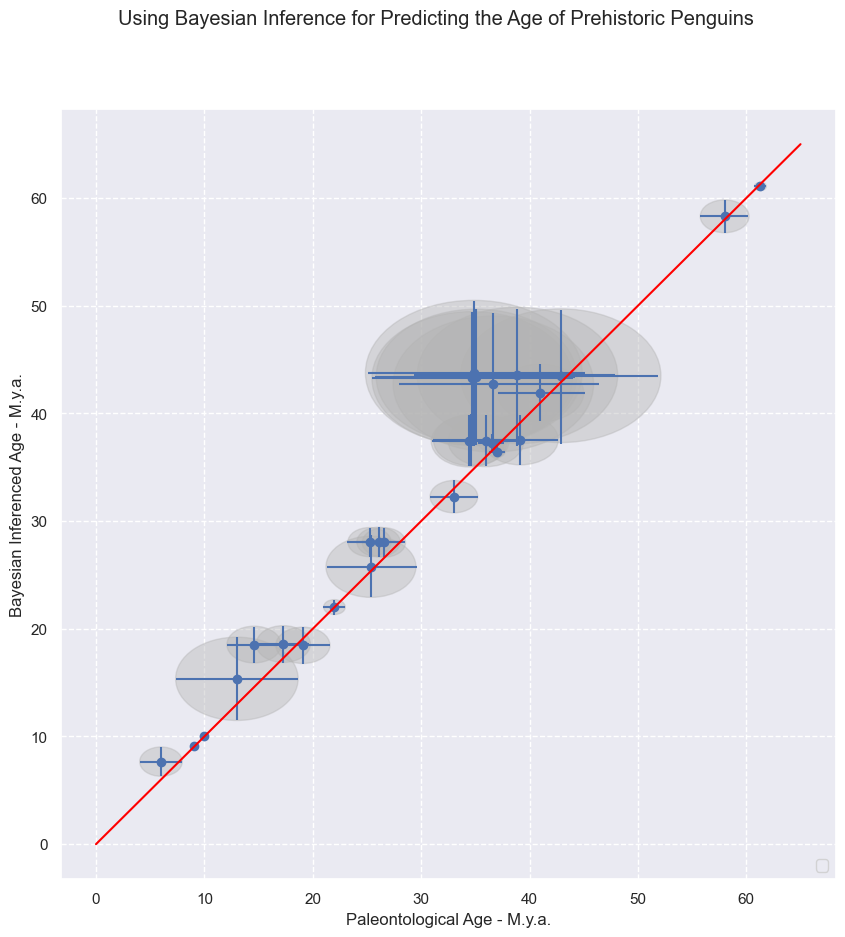

In [11]:
from matplotlib.patches import Ellipse

print(f'The R-squared value is {results[1]}')

width = np.zeros((2,len(estimated_ages_final)))
height = np.zeros((2,len(estimated_ages_final)))

line = np.linspace(0,65,1000)
x_pts = np.linspace(0,65,1000)
fig, ax = plt.subplots(figsize =(10,10))
for i in range(len(estimated_ages_final)):

    w = age_band_high_final[i] - age_band_low_final[i]
    h = estimated_ages_final[i] + errors_fixed[i][0] - (estimated_ages_final[i]-errors_fixed[i][1])
    
    width[0][i] = estimated_ages_final[i] - age_band_low_final[i]
    width[1][i] = age_band_high_final[i] - estimated_ages_final[i]
    
    height[0][i] = errors_fixed[i][0]
    height[1][i] = errors_fixed[i][1] 
    
    #print(i, width[0][i], width[1][i], height[0][i],height[1][i])
    
    circle1 = Ellipse((true_ages_final[i], estimated_ages_final[i]), w,h, color='.7')
    circle1.set_alpha(.4)
    ax.add_artist(circle1)
    
ax.errorbar(true_ages_final, estimated_ages_final,height,width,linestyle = '')   
ax.scatter(true_ages_final, estimated_ages_final)

ax.plot(x_pts, line, 'red')

ax.set_xlabel('Paleontological Age - M.y.a.')
ax.set_ylabel('Bayesian Inferenced Age - M.y.a.')
fig.suptitle(f'Using Bayesian Inference for Predicting the Age of Prehistoric Penguins')
ax.legend(loc = 'lower right')    

plt.grid(linestyle='--')

# ax.set_aspect(100)


plt.show()

Text(0.5, 0.98, 'Bayesian inferenced age vs Paleontological Age for the Labelled Penguins in Fig 2 of the Paper')

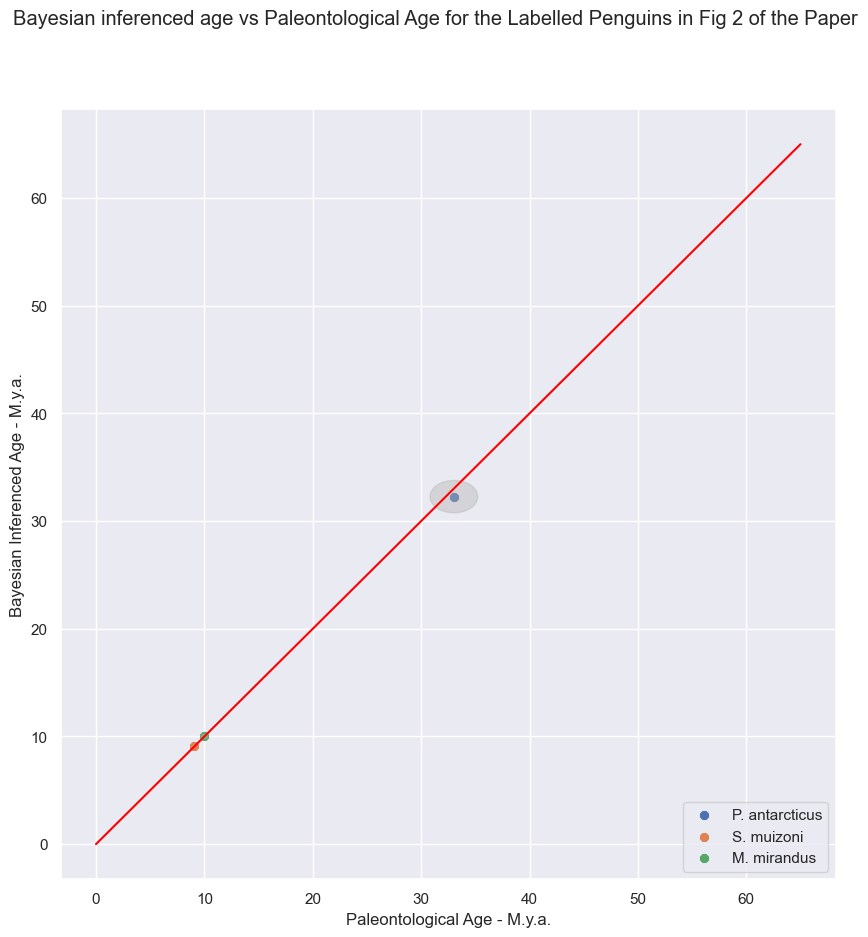

In [12]:
fig, ax = plt.subplots(figsize =(10,10))
for i in range(len(estimated_ages_final)):
        if(i==15 or i == 26 or i==27):
            ax.scatter(true_ages_final[i], estimated_ages_final[i], marker = '8',label = fossils_string_final[i].decode("utf-8") )
            
            w = age_band_high_final[i] - age_band_low_final[i]
            h = estimated_ages_final[i] + errors_fixed[i][0] - (estimated_ages_final[i]-errors_fixed[i][1])

            width[0][i] = estimated_ages_final[i] - age_band_low_final[i]
            width[1][i] = age_band_high_final[i] - estimated_ages_final[i]

            height[0][i] = errors_fixed[i][0]
            height[1][i] = errors_fixed[i][1] 

            #print(i, width[0][i], width[1][i], height[0][i],height[1][i])

            circle1 = Ellipse((true_ages_final[i], estimated_ages_final[i]), w,h, color='.7')
            circle1.set_alpha(.4)
            ax.add_artist(circle1)
            ax.legend(loc = 'lower right') 
ax.plot(x_pts, line, 'red')

ax.set_xlabel('Paleontological Age - M.y.a.')
ax.set_ylabel('Bayesian Inferenced Age - M.y.a.')
fig.suptitle(f'Bayesian inferenced age vs Paleontological Age for the Labelled Penguins in Fig 2 of the Paper')

# Analysis/Discussion

Comparing with the corresponding figure in the paper:

<div style="float:center;"><img src="Model1.PNG" width=550px></div>

we see that my model does seem to have several species having estimates lying outside the line $x=y$. However, if the vertical line for each ellipse (which is the upper and lower error bars of the bayesian inference using MCMC) crosses the $x=y$ line, then the estimate is within the 95% confidence interval. Correspondingly, if the horizaontal line for each ellipse (which is the upper and lower age range for a given species) crosses the $x=y$ line, then the estimate is within the phylogenetic age range as well. In my case, every species has an estimated age that falls within the phylogenetic age range, which is remarkable given the simplifications done to the model (i.e. not considering a fossilized-birth-death prior and assuming uniform priors for the variables $T$,$s$, and $r$, whereas the paper assumed a uniform prior only for $r$).

The fossils with the worst estimates generally seem to be the ones that have an actual carbon-dated age on the extremities of the age-gap specified for the given species. For example, P. klekowskii lived from 34–52.5 M.y.a, but the fossil was dated for 36.66 M.y.a. The simplified Bayesian model then estimated an age of 43.295 M.y.a. I would suspect a better choice of priors would improve this estimate, as I rely heavily on uniform priors (3 of my 4 variables I assigned to have a uniform prior).

With an $R^2$ value of 0.957, we see a stronger correlation in my model than that of the paper. However, a possible reason for this is due to discarding species that have no morphological data overlap with the reference fossil Waimainu Manneringi. Also, the reason I chose W. manneringi is that it is the ancestor of all the fossils in the data, so it seemed like a natural candidate to choose as a reference state.

We can improve the model by incorporating a fossilized-birth death prior, as explained earlier in the notebook. Also, we can investigate more advanced priors for the variables $T$,$s$, and $r$ instead of just uniform priors for them.

Adapted from https://furnstahl.github.io/Physics-8820/notebooks/Parameter_estimation/parameter_estimation_Gaussian_noise_compare_samplers.html., December 2021